1. Introduction/Business Problem

I would like to work with the business problem of where the most optimal place to open an Italien restaurant in Copenhagen is. To achieve this, i will use an analytical approach, where ill use advanced machine learning techniques and data analysis, concretely clustering and data visualization in form of maps.

During the process of analysis, several data transformations will be performed, in order the find the best possible data format for the machine learning model. Once the data is set up and prepared, a modeling process will be carried out, and this statistical analysis will provide the best possible places to locate the Italian restaurant.

The target audience of the report would be either new business owner og exiting looking to branch out there business. They would easily benefit from such an analysis, as it could be used to review where competitors are located. 

2. Data

There are two datasource i will use for my project:

1 - The Foursquare Api. 
I will obtain the most common venues per neighborhood in the city of Copenhagen. That way i can find out how the city's venues are distributed, what are the most common places for leisure, and in general, it will provide an idea of what people's likes are.

2 - A dataset from The copenhagen municipality. https://data.kk.dk/dataset/befolkningen-efter-ar-bydel-alder-og-statsborgerskab
The dataset contains information about the inmigrant population per nationality in the discrict of Copenhagen. This data will be used to determine the best location of the restaurant based on peoples nationalities. I will be assumed for this exercise that peoples likes varies according to their nationality, and that people from one specific country will be more attracted to place that matches the environment and culture of their own countries, rather than the ones from foreign countries.

The data set contains the following data:
    Year - 1992 - 2015
    District - Copenhagens 10 districts, with the numbers 1-10 will be replaced with names
    Age - Age of the population
    Population - Number
    Nationality ID - 4 digit code that can be used to find the nationality as described below

I will extract the features from the last year in the dataset "2015" and dismiss the age column and sum the dataset on year, district, natiality ID and pop. For the Nationality ID i will use a webpage for scrabing the name for the ID and then join the it on the dataset https://www.dst.dk/da/Statistik/dokumentation/Times/forebyggelsesregistret/statkode




1. A full report consisting of all of the following components (15 marks):
 - Introduction where you discuss the business problem and who would be interested in this project.
 - Data where you describe the data that will be used to solve the problem and the source of the data.
 - Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you      performed, and what machine learnings were used and why.
 - Results section where you discuss the results.
 - Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
 - Conclusion section where you conclude the report.
2. A link to your Notebook on your Github repository pushed showing your code. (15 marks)

3. Your choice of a presentation or blogpost. (10 marks)

Dataset:

1. Giv bydele navne udfra nedenstående:
10 bydele: 1=Indre By, 2=Østerbro, 3=Nørrebro, 4=Vesterbro/Kgs. Enghave, 5=Valby, 6=Vanløse, 7=Brønshøj-Husum, 8=Bispebjerg, 9=Amager Øst, 10=Amager Vest, 99=Udenfor inddeling
2. Hent tabellen vedr. Statskoder og join på
https://www.dst.dk/da/Statistik/dokumentation/Times/forebyggelsesregistret/statkode

3. Sum og group by på 2015

### Import necessary Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

!pip install watson-developer-cloud==1.5

from bs4 import BeautifulSoup
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 \
import Features, EntitiesOptions, KeywordsOptions, SemanticRolesOptions, SentimentOptions, EmotionOptions, ConceptsOptions, CategoriesOptions
print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  47.66 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  30.46 MB/s
vincent-0.4.4- 100% |################################| Time: 0:00:00  34.39 MB/s
folium-0.5.0-p 100% |################################| Time: 0:00:00  40.73 MB/s
    100% |████████████████████████████████| 225kB 4.2MB/s eta 0:00:01
Requirement not upgraded as not directly required: requests<3.0,>=2.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-developer-cloud==1.5)
Requirement not upgraded as not directly required: python_dateutil>=2.5.3 in /opt/conda/en

### Import populations dataset

In [2]:
# The code was removed by Watson Studio for sharing.

### Keep 2015 and rename headers  

In [3]:
df.dtypes
df['AAR'] = df['AAR'].apply(str)
df['BYDEL'] = df['BYDEL'].apply(str)
df['STATKODE'] = df['STATKODE'].apply(str)

In [4]:
df.rename(columns={'AAR':'Year','BYDEL':'Neighbourhood', 'STATKODE':'Nationality', 'PERSONER':'Population'}, 
                 inplace=True)
df = df[df['Year'].str.contains('2015')].reset_index(drop=True)
df.drop("ALDER", axis=1, inplace=True)
df.head()


,Year,Neighbourhood,Nationality,Population
0,2015,1,5100,614
1,2015,1,5104,2
2,2015,1,5106,1
3,2015,1,5110,1
4,2015,1,5120,4


In [5]:
df_4 = df.groupby(['Year','Neighbourhood', 'Nationality'])['Population'].sum().reset_index()
df_4.head()

,Year,Neighbourhood,Nationality,Population
0,2015,1,5100,44744
1,2015,1,5103,14
2,2015,1,5104,160
3,2015,1,5105,1
4,2015,1,5106,143


In [6]:
df_4.shape

(1485, 4)

### Now we replace Neighbourhood numbers with names and drop 99  

In [7]:
df_4.Neighbourhood.replace(['1','2','3','4','5','6','7','8','9','10'],['Indre By','Østerbro','Nørrebro','Vesterbro/Kgs. Enghave',
    'Valby','Vanløse','Brønshøj-Husum','Bispebjerg','Amager Øst','Amager Vest'], inplace=True)
df_5 = df_4[df_4.Neighbourhood != '99']
df_5.shape


(1380, 4)

In [8]:
df_5.head()


,Year,Neighbourhood,Nationality,Population
0,2015,Indre By,5100,44744
1,2015,Indre By,5103,14
2,2015,Indre By,5104,160
3,2015,Indre By,5105,1
4,2015,Indre By,5106,143


### Scrabing webpage for the Nationality names

In [9]:
r = requests.get("https://www.dst.dk/da/Statistik/dokumentation/Times/forebyggelsesregistret/statkode")
content = r.text
soup = BeautifulSoup(content, 'lxml')

In [10]:
data_table = soup.find('table', class_='table')

In [11]:
#convenrt the table into a datafram
dfImport = pd.read_html(str(data_table))
df_json = dfImport[0].to_json(orient='records')
df_json
df_Nat = pd.read_json(df_json)
df_Nat['Kode'] = df_Nat['Kode'].apply(str)
df_Nat.head()

,Gyldig fra,Gyldig til,Kode,Tekst
0,01-01-1600,31-12-9999,0,Uoplyst (1)
1,01-01-1600,31-12-9999,5001,Uoplyst (2)
2,01-01-1600,31-12-9999,5100,Danmark
3,01-01-1600,31-12-9999,5101,Grønland
4,01-01-1600,31-12-9999,5102,Udlandet uoplyst


In [12]:
df_sub = pd.merge(df_5, df_Nat, left_on= "Nationality", right_on="Kode", how='left')
df_Final = df_sub[['Year','Neighbourhood','Tekst','Population']].copy()
df_Final.head()

,Year,Neighbourhood,Tekst,Population
0,2015,Indre By,Danmark,44744
1,2015,Indre By,Statsløs,14
2,2015,Indre By,Finland,160
3,2015,Indre By,"Island, ligeret dansk",1
4,2015,Indre By,Island,143


In [13]:
df_Final = df_Final.drop(columns=['Year'])



In [14]:
df_Final = df_Final.pivot_table(index='Neighbourhood', columns='Tekst', values='Population', aggfunc='sum')


In [15]:
df_Final.fillna(0, inplace = True)

print(df_Final.shape)
#df_Final = df_Final.unstack()
df_Final.reset_index(level=None, inplace=True, col_level=0, col_fill='')
df_Final.head()

(10, 188)


Tekst,Neighbourhood,Afghanistan,Afrika uoplyst,Albanien,Algeriet,Angola,Argentina,Armenien,Aserbajdsjan,Asien uoplyst,Australien,Bahamas,Bangladesh,Barbados,Belgien,Belize,Benin,Bhutan,Bolivia,Bosnien-Hercegovina,Botswana,Brasilien,Brunei,Bulgarien,Burkina Faso,Burundi,Cambodja,Cameroun,Canada,Chile,Colombia,Comorerne,"Congo, Demokratiske Republik","Congo, Republikken",Costa Rica,Cuba,Cypern,Danmark,Djibouti,Dominica,Dominikanske Republik,Ecuador,Egypten,El Salvador,Elfenbenskysten,Eritrea,Estland,Etiopien,Fiji,Filippinerne,Finland,Forenede Arabiske Emirater,Frankrig,Gabon,Gambia,Georgien,Ghana,Grenada,Grækenland,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hviderusland,Indien,Indonesien,Irak,Iran,Irland,Island,"Island, ligeret dansk",Israel,Italien,Jamaica,Japan,Jordan,Jugoslavien,"Jugoslavien, Forbundsrepublikken",Kap Verde,Kasakhstan,Kenya,Kina,Kirgisistan,Kongelig,Kosovo,Kroatien,Kuwait,Land ukendt (1),Laos,Lesotho,Letland,Libanon,Liberia,Libyen,Liechtenstein,Litauen,Luxembourg,Madagaskar,Makedonien,Malawi,Malaysia,Maldiverne,Mali,Malta,Marokko,Mauretanien,Mauritius,Mellemøsten uoplyst,Mexico,Moldova,Mongoliet,Montenegro,Mozambique,Myanmar,Namibia,Nederlandene,Nepal,New Zealand,Nicaragua,Niger,Nigeria,Nordkorea,Norge,Oman,Pakistan,Panama,Paraguay,Peru,Polen,Portugal,Qatar,Rumænien,Rusland,Rwanda,Samoa,San Marino,Saudi-Arabien,Schweiz,Senegal,Serbien,Serbien og Montenegro,Seychellerne,Sierra Leone,Singapore,Skt. Lucia,Slovakiet,Slovenien,Somalia,Sovjetunionen,Spanien,Sri Lanka,Statsløs,Storbritannien,Sudan,Sverige,Swaziland,Sydafrika,Sydkorea,Syrien,Tadsjikistan,Taiwan,Tanzania,Tchad,Thailand,Tjekkiet,Tjekkoslovakiet,Togo,Tonga,Trinidad og Tobago,Tunesien,Turkmenistan,Tyrkiet,Tyskland,USA,Udlandet uoplyst,Uganda,Ukraine,Ungarn,Uoplyst (2),Uruguay,Usbekistan,Venezuela,Vietnam (2),Yemen,Zambia,Zimbabwe,Østrig
0,Amager Vest,97.0,0.0,1.0,10.0,0.0,21.0,9.0,7.0,0.0,66.0,0.0,45.0,0.0,32.0,1.0,0.0,1.0,2.0,49.0,1.0,68.0,1.0,139.0,1.0,4.0,0.0,13.0,69.0,13.0,17.0,1.0,0.0,4.0,1.0,13.0,7.0,55452.0,3.0,0.0,3.0,9.0,24.0,1.0,7.0,7.0,46.0,36.0,2.0,248.0,112.0,0.0,243.0,0.0,12.0,1.0,32.0,1.0,76.0,1.0,0.0,7.0,0.0,0.0,0.0,9.0,202.0,24.0,274.0,125.0,53.0,362.0,0.0,23.0,352.0,3.0,46.0,10.0,55.0,8.0,0.0,2.0,19.0,505.0,0.0,0.0,11.0,29.0,2.0,0.0,0.0,0.0,77.0,50.0,4.0,2.0,0.0,188.0,2.0,0.0,35.0,0.0,17.0,1.0,7.0,2.0,162.0,0.0,1.0,0.0,28.0,5.0,0.0,10.0,0.0,0.0,2.0,100.0,55.0,24.0,2.0,1.0,36.0,4.0,436.0,0.0,335.0,4.0,0.0,13.0,392.0,95.0,1.0,220.0,120.0,5.0,0.0,0.0,1.0,39.0,4.0,28.0,4.0,0.0,11.0,30.0,0.0,45.0,7.0,126.0,2.0,224.0,9.0,43.0,492.0,20.0,477.0,2.0,10.0,35.0,14.0,0.0,16.0,7.0,0.0,191.0,30.0,1.0,1.0,0.0,0.0,14.0,1.0,445.0,460.0,274.0,0.0,23.0,91.0,110.0,0.0,1.0,4.0,12.0,48.0,0.0,3.0,2.0,44.0
1,Amager Øst,49.0,0.0,5.0,5.0,0.0,9.0,4.0,0.0,0.0,34.0,0.0,24.0,0.0,21.0,0.0,0.0,0.0,3.0,33.0,1.0,66.0,0.0,159.0,0.0,9.0,2.0,1.0,51.0,19.0,18.0,0.0,1.0,0.0,4.0,15.0,2.0,47873.0,0.0,0.0,1.0,4.0,18.0,0.0,6.0,5.0,45.0,14.0,0.0,202.0,78.0,0.0,155.0,0.0,11.0,0.0,25.0,2.0,82.0,5.0,2.0,0.0,0.0,0.0,1.0,5.0,136.0,15.0,124.0,66.0,38.0,293.0,0.0,18.0,304.0,0.0,45.0,19.0,55.0,2.0,0.0,0.0,20.0,303.0,0.0,0.0,5.0,25.0,0.0,1.0,0.0,0.0,57.0,15.0,0.0,1.0,0.0,165.0,2.0,1.0,64.0,0.0,6.0,0.0,0.0,6.0,64.0,0.0,3.0,0.0,22.0,0.0,0.0,4.0,4.0,1.0,2.0,79.0,133.0,12.0,4.0,0.0,34.0,1.0,345.0,0.0,261.0,7.0,0.0,14.0,506.0,75.0,0.0,202.0,72.0,5.0,0.0,0.0,1.0,23.0,3.0,20.0,1.0,1.0,6.0,4.0,0.0,28.0,5.0,96.0,6.0,162.0,4.0,20.0,344.0,7.0,382.0,0.0,5.0,10.0,17.0,1.0,4.0,17.0,0.0,205.0,22.0,0.0,1.0,0.0,6.0,9.0,0.0,289.0,372.0,202.0,1.0,17.0,50.0,76.0,0.0,3.0,3.0,10.0,29.0,0.0,2.0,3.0,33.0
2,Bispebjerg,97.0,2.0,6.0,15.0,0.0,11.0,8.0,2.0,0.0,44.0,0.0,252.0,0.0,29.0,0.0,0.0,3.0,1.0,96.0,0.0,54.0,1.0,182.0,4.0,7.0,6.0,7.0,40.0,32.0,21.0,0.0,2.0,0.0,4.0,24.0,1.0,42662.0,1.0,1.0,1.0,9.0,65.0,0.0,34.0,4.0,28.0,37.0,0.0,136.0,71.0,0.0,135.0,0.0,40.0,0.0,77.0,1.0,96.0,2.0,5.0,0.0,0.0,3.0,0.0,2.0,294.0,9.0,414.0,198.0,45.0,136.0,0.0,20.0,273.0,3.0,17.0,70.0,309.0,9.0,1.0,3.0,19.0,275.0,6.0,0.0,11.

In [16]:
coordinates_df = pd.DataFrame( data = {

'Neighborhood' : ['Indre By','Østerbro','Nørrebro','Vesterbro/Kgs. Enghave','Valby','Vanløse','Brønshøj-Husum','Bispebjerg','Amager Øst','Amager Vest'],
'Latitude' : ['55.678316', '55.701539', '55.694574', '55.668443', '55.662052', '55.686833', '55.706569', '55.713338', '55.616516',
                 '55.656049'],
'Longitude' : ['12.575872', '12.585481', '12.546701', '12.557340', '12.516845', '12.489733', '12.486981', '12.523701', '12.623910', 
                  '12.591308']})
coordinates_df['Latitude'] = coordinates_df['Latitude'].astype('float', errors = 'ignore')
coordinates_df['Longitude'] = coordinates_df['Longitude'].astype('float', errors = 'ignore')
coordinates_df

,Latitude,Longitude,Neighborhood
0,55.678316,12.575872,Indre By
1,55.701539,12.585481,Østerbro
2,55.694574,12.546701,Nørrebro
3,55.668443,12.557340,Vesterbro/Kgs. Enghave
4,55.662052,12.516845,Valby
5,55.686833,12.489733,Vanløse
6,55.706569,12.486981,Brønshøj-Husum
7,55.713338,12.523701,Bispebjerg
8,55.616516,12.623910,Amager Øst
9,55.656049,12.591308,Amager Vest


### Now that we have our data set for population in copenhagen split by neighbourhood and nationality we will import Foursquare data

But first will see a map of our Neigbourhood

In [17]:
address = 'Copenhagen, Copenhagen'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Copenhagen are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Copenhagen are 55.6867243, 12.5700724.


In [18]:
CPH_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(coordinates_df['Latitude'], coordinates_df['Longitude'], coordinates_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(CPH_map)  
    
CPH_map

In [19]:
CLIENT_ID = 'LILMRQBHDJODE3LCZOIBM0WPT4PGM3ZYJDJODKU0MGN45I0X' # your Foursquare ID
CLIENT_SECRET = '2OG5515AFX3SQREIGAODXSUHKUBANFW2NVYSTHEBSDQZRLMV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT= 500


In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
CPH_Restaurant = getNearbyVenues(names= coordinates_df['Neighborhood'],
                                   latitudes= coordinates_df['Latitude'],
                                   longitudes= coordinates_df['Longitude']
                                  )

Indre By
Østerbro
Nørrebro
Vesterbro/Kgs. Enghave
Valby
Vanløse
Brønshøj-Husum
Bispebjerg
Amager Øst
Amager Vest


In [22]:
print(CPH_Restaurant.shape)
CPH_Restaurant.head()

(713, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Indre By,55.678316,12.575872,Ruby,55.676703,12.576727,Cocktail Bar
1,Indre By,55.678316,12.575872,Illums Bolighus,55.678855,12.578590,Furniture / Home Store
2,Indre By,55.678316,12.575872,Bastard Café,55.676483,12.574992,Gaming Cafe
3,Indre By,55.678316,12.575872,Faraos Cigarer,55.679538,12.574541,Comic Shop
4,Indre By,55.678316,12.575872,HAY House,55.678971,12.579997,Furniture / Home Store


In [23]:
CPH_Restaurant.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Amager Vest,79,79,79,79,79,79
Amager Øst,18,18,18,18,18,18
Bispebjerg,49,49,49,49,49,49
Brønshøj-Husum,44,44,44,44,44,44
Indre By,100,100,100,100,100,100
Nørrebro,100,100,100,100,100,100
Valby,57,57,57,57,57,57
Vanløse,68,68,68,68,68,68
Vesterbro/Kgs. Enghave,100,100,100,100,100,100


In [24]:
# one hot encoding
CPH_onehot = pd.get_dummies(CPH_Restaurant[['Venue Category']], prefix="", prefix_sep="")

CPH_onehot['Neighborhood'] = CPH_Restaurant['Neighborhood'] 

# add neighborhood column back to dataframe
# move neighborhood column to the first column
fixed_columns = [CPH_onehot.columns[-1]] + list(CPH_onehot.columns[:-1])
CPH_onehot = CPH_onehot[fixed_columns]

CPH_onehot.head()

,Zoo,Advertising Agency,African Restaurant,Airport Terminal,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Basketball Court,Beer Bar,Beer Garden,Beer Store,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Station,Café,Camera Store,Candy Store,Capitol Building,Castle,Cemetery,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Dive Bar,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden Center,Gastropub,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hockey Field,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Kebab Restaurant,Korean Restaurant,Lake,Library,Light Rail Station,Lighthouse,Liquor Store,Lounge,Market,Massage Studio,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Music Venue,Neighborhood,Outdoor Gym,Park,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Pub,Racetrack,Ramen Restaurant,Record Shop,Restaurant,Rock Club,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shopping Mall,Skate Park,Soccer Field,Soccer Stadium,South American Restaurant,South Indian Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Toy / Game Store,Track,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Indre By,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Indre By,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Indre By,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Indre By,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Indre By,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
CPH_onehot.shape

(713, 167)

In [26]:
CPH_grouped = CPH_onehot.groupby('Neighborhood').mean().reset_index()
CPH_grouped

,Neighborhood,Zoo,Advertising Agency,African Restaurant,Airport Terminal,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Basketball Court,Beer Bar,Beer Garden,Beer Store,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Station,Café,Camera Store,Candy Store,Capitol Building,Castle,Cemetery,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Dive Bar,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden Center,Gastropub,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hockey Field,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Kebab Restaurant,Korean Restaurant,Lake,Library,Light Rail Station,Lighthouse,Liquor Store,Lounge,Market,Massage Studio,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Music Venue,Outdoor Gym,Park,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Pub,Racetrack,Ramen Restaurant,Record Shop,Restaurant,Rock Club,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shopping Mall,Skate Park,Soccer Field,Soccer Stadium,South American Restaurant,South Indian Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Toy / Game Store,Track,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Amager Vest,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.075949,0.012658,0.000000,0.012658,0.00,0.00,0.00,0.000000,0.00,0.00,0.012658,0.012658,0.000000,0.025316,0.012658,0.075949,0.00,0.000000,0.00,0.000000,0.00,0.025316,0.00,0.000000,0.000000,0.000000,0.037975,0.000000,0.000000,0.00,0.00,0.00,0.050633,0.000000,0.000000,0.000000,0.00,0.000000,0.012658,0.012658,0.012658,0.000000,0.012658,0.012658,0.000000,0.037975,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012658,0.012658,0.000000,0.025316,0.000000,0.063291,0.000000,0.012658,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012658,0.037975,0.012658,0.00,0.037975,0.012658,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.012658,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.025316,0.00,0.000000,0.000000,0.00,0.000000,0.088608,0.000000,0.000000,0.000000,0.025316,0.00,0.000000,0.00,0.000000,0.012658,0.012658,0.00,0.000000,0.00,0.025316,0.012658,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.012658,0.037975,0.000000,0.00,0.00,0.00,0.012658,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.012658,0.012658,0.00,0.00
1,Amager Øst,0.000000,0.00,0.00,0.055556,0.055556,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.055556,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000

In [27]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [28]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = CPH_grouped['Neighborhood']

for ind in np.arange(CPH_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(CPH_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amager Vest,Pizza Place,Café,Bakery,Gym / Fitness Center,Concert Hall,Sushi Restaurant,Ice Cream Shop,Italian Restaurant,Fast Food Restaurant,Coffee Shop
1,Amager Øst,Brewery,Hotel,History Museum,Fast Food Restaurant,Massage Studio,Scandinavian Restaurant,Food Truck,Football Stadium,Motorcycle Shop,Furniture / Home Store
2,Bispebjerg,Pizza Place,Café,Plaza,Grocery Store,Park,Gym,Gym / Fitness Center,Bakery,Supermarket,Sushi Restaurant
3,Brønshøj-Husum,Grocery Store,Supermarket,Playground,Plaza,Café,Train Station,Chinese Restaurant,Bus Station,Restaurant,Candy Store
4,Indre By,Coffee Shop,Café,Bakery,Cocktail Bar,Clothing Store,Furniture / Home Store,Hotel,Burger Joint,Scandinavian Restaurant,Bar
5,Nørrebro,Café,Wine Bar,Beer Bar,Coffee Shop,Thai Restaurant,Playground,Pizza Place,Scandinavian Restaurant,Cocktail Bar,Bakery
6,Valby,Exhibit,Grocery Store,Train Station,Gym / Fitness Center,Park,Sushi Restaurant,Pizza Place,Pool,Music Venue,Coffee Shop
7,Vanløse,Grocery Store,Pizza Place,Convenience Store,Gym,Train Station,Soccer Field,Bakery,Flower Shop,Gym / Fitness Center,Park
8,Vesterbro/Kgs. Enghave,Café,Cocktail Bar,Hotel,Wine Bar,Coffee Shop,Scandinavian Restaurant,Pizza Place,Japanese Restaurant,Italian Restaurant,Music Venue
9,Østerbro,Coffee Shop,Bakery,Ice Cream Shop,Playground,Harbor / Marina,Scandinavian Restaurant,Park,Pizza Place,Plaza,Bar


Get neighborhoods's clusters and determine the optimal value of K for our dataset using the Elbow method

In [29]:
CPH_grouped_clustering = CPH_grouped.drop('Neighborhood', 1)

Sum_of_squared_distances = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(CPH_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

In [30]:
optimal_k= pd.DataFrame(data= Sum_of_squared_distances, columns = ['Sum_of_squared_distances'], index = K)
optimal_k.rename_axis('K', axis = 'columns', inplace = True)
#optimal_k

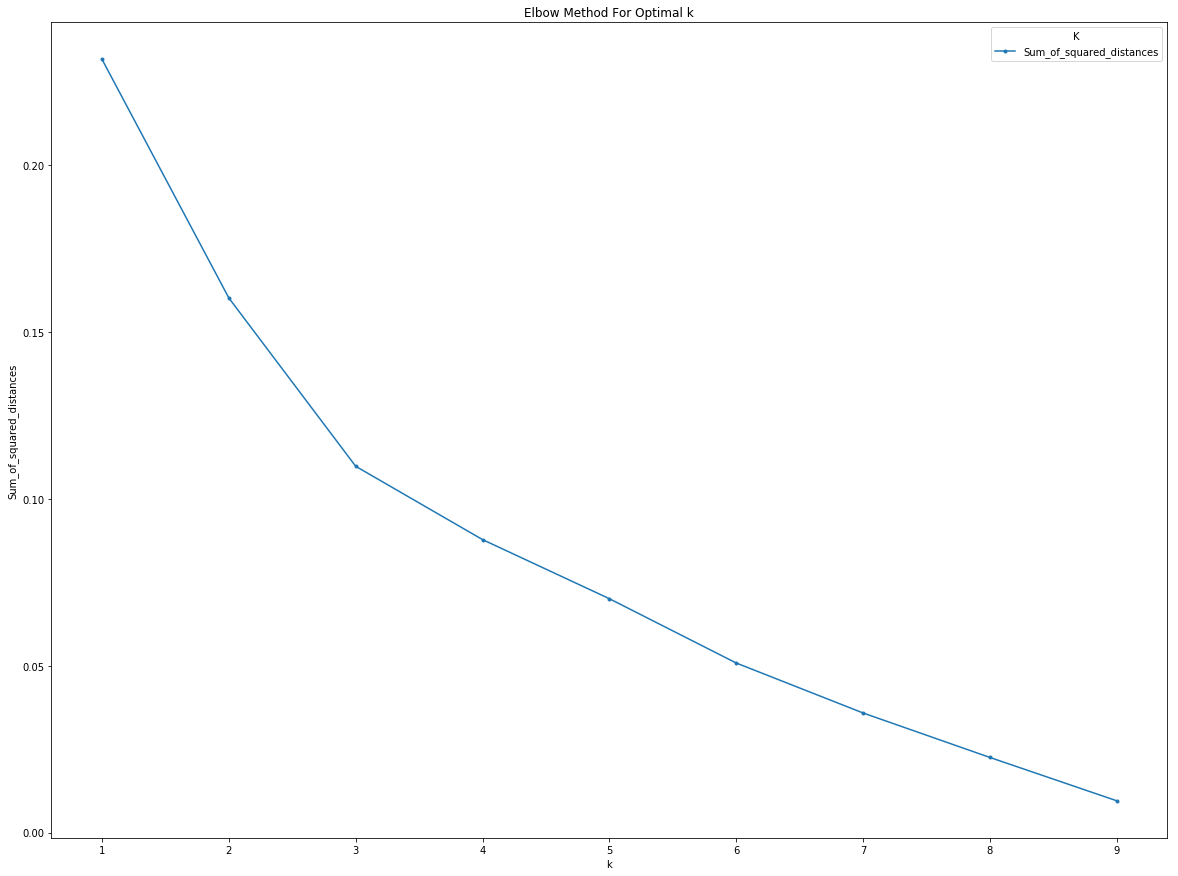

In [31]:
optimal_k.plot(kind = 'line', figsize = (20, 15), marker = '.')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Base on ELBOW our best suitable K value is 4.

In [32]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(CPH_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 2, 3, 1, 0, 0, 3, 1, 0, 0], dtype=int32)

In [33]:
#df_Final['Neighbourhood'] = neighborhoods_venues_sorted['Neighborhood']
df_Final.dtypes

Tekst
Neighbourhood                        object
Afghanistan                         float64
Afrika uoplyst                      float64
Albanien                            float64
Algeriet                            float64
Angola                              float64
Argentina                           float64
Armenien                            float64
Aserbajdsjan                        float64
Asien uoplyst                       float64
Australien                          float64
Bahamas                             float64
Bangladesh                          float64
Barbados                            float64
Belgien                             float64
Belize                              float64
Benin                               float64
Bhutan                              float64
Bolivia                             float64
Bosnien-Hercegovina                 float64
Botswana                            float64
Brasilien                           float64
Brunei                    

In [34]:
CPH_merged = pd.merge(df_Final, neighborhoods_venues_sorted, left_on= "Neighbourhood", right_on="Neighborhood")
CPH_merged['Cluster Labels'] = kmeans.labels_
CPH_merged[['Latitude', 'Longitude']] = coordinates_df[['Latitude', 'Longitude']]
CPH_merged['Latitude'] = CPH_merged['Latitude'].astype(float)
CPH_merged['Longitude'] = CPH_merged['Longitude'].astype(float)
print(CPH_merged.shape)
CPH_merged # check the last columns!

(10, 203)


,Neighbourhood,Afghanistan,Afrika uoplyst,Albanien,Algeriet,Angola,Argentina,Armenien,Aserbajdsjan,Asien uoplyst,Australien,Bahamas,Bangladesh,Barbados,Belgien,Belize,Benin,Bhutan,Bolivia,Bosnien-Hercegovina,Botswana,Brasilien,Brunei,Bulgarien,Burkina Faso,Burundi,Cambodja,Cameroun,Canada,Chile,Colombia,Comorerne,"Congo, Demokratiske Republik","Congo, Republikken",Costa Rica,Cuba,Cypern,Danmark,Djibouti,Dominica,Dominikanske Republik,Ecuador,Egypten,El Salvador,Elfenbenskysten,Eritrea,Estland,Etiopien,Fiji,Filippinerne,Finland,Forenede Arabiske Emirater,Frankrig,Gabon,Gambia,Georgien,Ghana,Grenada,Grækenland,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hviderusland,Indien,Indonesien,Irak,Iran,Irland,Island,"Island, ligeret dansk",Israel,Italien,Jamaica,Japan,Jordan,Jugoslavien,"Jugoslavien, Forbundsrepublikken",Kap Verde,Kasakhstan,Kenya,Kina,Kirgisistan,Kongelig,Kosovo,Kroatien,Kuwait,Land ukendt (1),Laos,Lesotho,Letland,Libanon,Liberia,Libyen,Liechtenstein,Litauen,Luxembourg,Madagaskar,Makedonien,Malawi,Malaysia,Maldiverne,Mali,Malta,Marokko,Mauretanien,Mauritius,Mellemøsten uoplyst,Mexico,Moldova,Mongoliet,Montenegro,Mozambique,Myanmar,Namibia,Nederlandene,Nepal,New Zealand,Nicaragua,Niger,Nigeria,Nordkorea,Norge,Oman,Pakistan,Panama,Paraguay,Peru,Polen,Portugal,Qatar,Rumænien,Rusland,Rwanda,Samoa,San Marino,Saudi-Arabien,Schweiz,Senegal,Serbien,Serbien og Montenegro,Seychellerne,Sierra Leone,Singapore,Skt. Lucia,Slovakiet,Slovenien,Somalia,Sovjetunionen,Spanien,Sri Lanka,Statsløs,Storbritannien,Sudan,Sverige,Swaziland,Sydafrika,Sydkorea,Syrien,Tadsjikistan,Taiwan,Tanzania,Tchad,Thailand,Tjekkiet,Tjekkoslovakiet,Togo,Tonga,Trinidad og Tobago,Tunesien,Turkmenistan,Tyrkiet,Tyskland,USA,Udlandet uoplyst,Uganda,Ukraine,Ungarn,Uoplyst (2),Uruguay,Usbekistan,Venezuela,Vietnam (2),Yemen,Zambia,Zimbabwe,Østrig,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Latitude,Longitude
0,Amager Vest,97.0,0.0,1.0,10.0,0.0,21.0,9.0,7.0,0.0,66.0,0.0,45.0,0.0,32.0,1.0,0.0,1.0,2.0,49.0,1.0,68.0,1.0,139.0,1.0,4.0,0.0,13.0,69.0,13.0,17.0,1.0,0.0,4.0,1.0,13.0,7.0,55452.0,3.0,0.0,3.0,9.0,24.0,1.0,7.0,7.0,46.0,36.0,2.0,248.0,112.0,0.0,243.0,0.0,12.0,1.0,32.0,1.0,76.0,1.0,0.0,7.0,0.0,0.0,0.0,9.0,202.0,24.0,274.0,125.0,53.0,362.0,0.0,23.0,352.0,3.0,46.0,10.0,55.0,8.0,0.0,2.0,19.0,505.0,0.0,0.0,11.0,29.0,2.0,0.0,0.0,0.0,77.0,50.0,4.0,2.0,0.0,188.0,2.0,0.0,35.0,0.0,17.0,1.0,7.0,2.0,162.0,0.0,1.0,0.0,28.0,5.0,0.0,10.0,0.0,0.0,2.0,100.0,55.0,24.0,2.0,1.0,36.0,4.0,436.0,0.0,335.0,4.0,0.0,13.0,392.0,95.0,1.0,220.0,120.0,5.0,0.0,0.0,1.0,39.0,4.0,28.0,4.0,0.0,11.0,30.0,0.0,45.0,7.0,126.0,2.0,224.0,9.0,43.0,492.0,20.0,477.0,2.0,10.0,35.0,14.0,0.0,16.0,7.0,0.0,191.0,30.0,1.0,1.0,0.0,0.0,14.0,1.0,445.0,460.0,274.0,0.0,23.0,91.0,110.0,0.0,1.0,4.0,12.0,48.0,0.0,3.0,2.0,44.0,Amager Vest,Pizza Place,Café,Bakery,Gym / Fitness Center,Concert Hall,Sushi Restaurant,Ice Cream Shop,Italian Restaurant,Fast Food Restaurant,Coffee Shop,3,55.678316,12.575872
1,Amager Øst,49.0,0.0,5.0,5.0,0.0,9.0,4.0,0.0,0.0,34.0,0.0,24.0,0.0,21.0,0.0,0.0,0.0,3.0,33.0,1.0,66.0,0.0,159.0,0.0,9.0,2.0,1.0,51.0,19.0,18.0,0.0,1.0,0.0,4.0,15.0,2.0,47873.0,0.0,0.0,1.0,4.0,18.0,0.0,6.0,5.0,45.0,14.0,0.0,202.0,78.0,0.0,155.0,0.0,11.0,0.0,25.0,2.0,82.0,5.0,2.0,0.0,0.0,0.0,1.0,5.0,136.0,15.0,124.0,66.0,38.0,293.0,0.0,18.0,304.0,0.0,45.0,19.0,55.0,2.0,0.0,0.0,20.0,303.0,0.0,0.0,5.0,25.0,0.0,1.0,0.0,0.0,57.0,15.0,0.0,1.0,0.0,165.0,2.0,1.0,64.0,0.0,6.0,0.0,0.0,6.0,64.0,0.0,3.0,0.0,22.0,0.0,0.0,4.0,4.0,1.0,2.0,79.0,133.0,12.0,4.0,0.0,34.0,1.0,345.0,0.0,261.0,7.0,0.0,14.0,506.0,75.0,0.0,202.0,72.0,5.0,0.0,0.0,1.0,23.0,3.0,20.0,1.0,1.0,6.0,4.0,0.0,28.0,5.0,96.0,6.0,162.0,4.0,20.0,344.0,7.0,382.0,0.0,5.0,10.0,17.0,1.0,4.0,17.0,0.0,205.0,22.0,0.0,1.0,0.0,6.0,9.0,0.0,289.0,372.0,202.0,1.0,17.0,50.0,76.0,0.0,3.

In [42]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(CPH_merged['Latitude'], CPH_merged['Longitude'], CPH_merged['Neighborhood'], CPH_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [43]:
CPH_merged.loc[CPH_merged['Cluster Labels'] == 0, CPH_merged.columns[[0] + list(range(5, CPH_merged.shape[1]))]].sort_values(by = ['Neighbourhood'], ascending = False)

,Neighbourhood,Angola,Argentina,Armenien,Aserbajdsjan,Asien uoplyst,Australien,Bahamas,Bangladesh,Barbados,Belgien,Belize,Benin,Bhutan,Bolivia,Bosnien-Hercegovina,Botswana,Brasilien,Brunei,Bulgarien,Burkina Faso,Burundi,Cambodja,Cameroun,Canada,Chile,Colombia,Comorerne,"Congo, Demokratiske Republik","Congo, Republikken",Costa Rica,Cuba,Cypern,Danmark,Djibouti,Dominica,Dominikanske Republik,Ecuador,Egypten,El Salvador,Elfenbenskysten,Eritrea,Estland,Etiopien,Fiji,Filippinerne,Finland,Forenede Arabiske Emirater,Frankrig,Gabon,Gambia,Georgien,Ghana,Grenada,Grækenland,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hviderusland,Indien,Indonesien,Irak,Iran,Irland,Island,"Island, ligeret dansk",Israel,Italien,Jamaica,Japan,Jordan,Jugoslavien,"Jugoslavien, Forbundsrepublikken",Kap Verde,Kasakhstan,Kenya,Kina,Kirgisistan,Kongelig,Kosovo,Kroatien,Kuwait,Land ukendt (1),Laos,Lesotho,Letland,Libanon,Liberia,Libyen,Liechtenstein,Litauen,Luxembourg,Madagaskar,Makedonien,Malawi,Malaysia,Maldiverne,Mali,Malta,Marokko,Mauretanien,Mauritius,Mellemøsten uoplyst,Mexico,Moldova,Mongoliet,Montenegro,Mozambique,Myanmar,Namibia,Nederlandene,Nepal,New Zealand,Nicaragua,Niger,Nigeria,Nordkorea,Norge,Oman,Pakistan,Panama,Paraguay,Peru,Polen,Portugal,Qatar,Rumænien,Rusland,Rwanda,Samoa,San Marino,Saudi-Arabien,Schweiz,Senegal,Serbien,Serbien og Montenegro,Seychellerne,Sierra Leone,Singapore,Skt. Lucia,Slovakiet,Slovenien,Somalia,Sovjetunionen,Spanien,Sri Lanka,Statsløs,Storbritannien,Sudan,Sverige,Swaziland,Sydafrika,Sydkorea,Syrien,Tadsjikistan,Taiwan,Tanzania,Tchad,Thailand,Tjekkiet,Tjekkoslovakiet,Togo,Tonga,Trinidad og Tobago,Tunesien,Turkmenistan,Tyrkiet,Tyskland,USA,Udlandet uoplyst,Uganda,Ukraine,Ungarn,Uoplyst (2),Uruguay,Usbekistan,Venezuela,Vietnam (2),Yemen,Zambia,Zimbabwe,Østrig,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Latitude,Longitude
9,Østerbro,2.0,18.0,10.0,4.0,0.0,104.0,2.0,50.0,2.0,38.0,0.0,0.0,1.0,5.0,46.0,2.0,82.0,0.0,94.0,0.0,3.0,0.0,9.0,112.0,24.0,17.0,0.0,0.0,3.0,4.0,17.0,2.0,65846.0,1.0,0.0,2.0,4.0,25.0,1.0,8.0,2.0,36.0,13.0,0.0,178.0,151.0,0.0,337.0,1.0,16.0,6.0,25.0,0.0,105.0,3.0,3.0,0.0,0.0,1.0,2.0,8.0,433.0,22.0,111.0,98.0,103.0,188.0,0.0,37.0,472.0,3.0,77.0,14.0,92.0,7.0,1.0,4.0,11.0,251.0,0.0,2.0,3.0,17.0,0.0,0.0,0.0,2.0,55.0,18.0,1.0,1.0,0.0,119.0,1.0,0.0,63.0,1.0,22.0,0.0,0.0,1.0,83.0,1.0,6.0,0.0,37.0,5.0,0.0,6.0,2.0,6.0,0.0,163.0,51.0,23.0,3.0,0.0,20.0,0.0,515.0,0.0,136.0,1.0,0.0,22.0,335.0,103.0,0.0,129.0,158.0,1.0,1.0,1.0,1.0,57.0,1.0,35.0,5.0,0.0,0.0,30.0,1.0,35.0,21.0,88.0,16.0,326.0,7.0,23.0,622.0,4.0,639.0,0.0,24.0,13.0,5.0,0.0,12.0,13.0,0.0,105.0,32.0,3.0,11.0,0.0,5.0,12.0,0.0,183.0,557.0,500.0,0.0,10.0,55.0,55.0,0.0,5.0,5.0,10.0,16.0,0.0,2.0,0.0,50.0,Østerbro,Coffee Shop,Bakery,Ice Cream Shop,Playground,Harbor / Marina,Scandinavian Restaurant,Park,Pizza Place,Plaza,Bar,0,55.656049,12.591308
8,Vesterbro/Kgs. Enghave,1.0,15.0,5.0,7.0,0.0,79.0,0.0,23.0,1.0,18.0,0.0,0.0,0.0,4.0,69.0,0.0,78.0,0.0,139.0,1.0,2.0,7.0,6.0,85.0,27.0,17.0,0.0,2.0,6.0,4.0,25.0,3.0,51898.0,3.0,0.0,2.0,5.0,25.0,0.0,6.0,3.0,32.0,9.0,0.0,124.0,104.0,0.0,325.0,0.0,11.0,7.0,49.0,0.0,88.0,1.0,5.0,4.0,0.0,0.0,1.0,6.0,224.0,8.0,161.0,79.0,68.0,347.0,0.0,24.0,462.0,4.0,45.0,17.0,142.0,7.0,1.0,2.0,8.0,257.0,0.0,0.0,9.0,72.0,0.0,0.0,0.0,0.0,48.0,12.0,1.0,0.0,0.0,136.0,1.0,0.0,111.0,0.0,9.0,0.0,1.0,4.0,179.0,0.0,1.0,1.0,33.0,2.0,3.0,10.0,3.0,4.0,0.0,111.0,68.0,12.0,3.0,0.0,20.0,2.0,530.0,1.0,631.0,0.0,1.0,7.0,376.0,160.0,0.0,203.0,83.0,6.0,0.0,0.0,0.0,45.0,5.0,13.0,2.0,0.0,2.0,16.0,0.0,28.0,13.0,97.0,4.0,226.0,12.0,25.0,628.0,3.0,620.0,0.0,15.0,16.0,16.0,0.0,4.0,12.0,2.0,247.0,32.0,1.0,2.0,2.0,1.0,16.0,0.0,414.0,474.0,247.0,3.0,13.0,33.0,96.0,0.0,1.0,11.0,6.0,43.0,1.0,3.0,2.0,52.0,Vesterbro/Kgs. Enghave,Café,Cocktail Bar,Hotel,Wine Bar,Coffee S

In [44]:
CPH_merged.loc[CPH_merged['Cluster Labels'] == 1, CPH_merged.columns[[0] + list(range(5, CPH_merged.shape[1]))]].sort_values(by = ['Neighbourhood'], ascending = False)

,Neighbourhood,Angola,Argentina,Armenien,Aserbajdsjan,Asien uoplyst,Australien,Bahamas,Bangladesh,Barbados,Belgien,Belize,Benin,Bhutan,Bolivia,Bosnien-Hercegovina,Botswana,Brasilien,Brunei,Bulgarien,Burkina Faso,Burundi,Cambodja,Cameroun,Canada,Chile,Colombia,Comorerne,"Congo, Demokratiske Republik","Congo, Republikken",Costa Rica,Cuba,Cypern,Danmark,Djibouti,Dominica,Dominikanske Republik,Ecuador,Egypten,El Salvador,Elfenbenskysten,Eritrea,Estland,Etiopien,Fiji,Filippinerne,Finland,Forenede Arabiske Emirater,Frankrig,Gabon,Gambia,Georgien,Ghana,Grenada,Grækenland,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hviderusland,Indien,Indonesien,Irak,Iran,Irland,Island,"Island, ligeret dansk",Israel,Italien,Jamaica,Japan,Jordan,Jugoslavien,"Jugoslavien, Forbundsrepublikken",Kap Verde,Kasakhstan,Kenya,Kina,Kirgisistan,Kongelig,Kosovo,Kroatien,Kuwait,Land ukendt (1),Laos,Lesotho,Letland,Libanon,Liberia,Libyen,Liechtenstein,Litauen,Luxembourg,Madagaskar,Makedonien,Malawi,Malaysia,Maldiverne,Mali,Malta,Marokko,Mauretanien,Mauritius,Mellemøsten uoplyst,Mexico,Moldova,Mongoliet,Montenegro,Mozambique,Myanmar,Namibia,Nederlandene,Nepal,New Zealand,Nicaragua,Niger,Nigeria,Nordkorea,Norge,Oman,Pakistan,Panama,Paraguay,Peru,Polen,Portugal,Qatar,Rumænien,Rusland,Rwanda,Samoa,San Marino,Saudi-Arabien,Schweiz,Senegal,Serbien,Serbien og Montenegro,Seychellerne,Sierra Leone,Singapore,Skt. Lucia,Slovakiet,Slovenien,Somalia,Sovjetunionen,Spanien,Sri Lanka,Statsløs,Storbritannien,Sudan,Sverige,Swaziland,Sydafrika,Sydkorea,Syrien,Tadsjikistan,Taiwan,Tanzania,Tchad,Thailand,Tjekkiet,Tjekkoslovakiet,Togo,Tonga,Trinidad og Tobago,Tunesien,Turkmenistan,Tyrkiet,Tyskland,USA,Udlandet uoplyst,Uganda,Ukraine,Ungarn,Uoplyst (2),Uruguay,Usbekistan,Venezuela,Vietnam (2),Yemen,Zambia,Zimbabwe,Østrig,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Latitude,Longitude
7,Vanløse,1.0,5.0,3.0,1.0,0.0,17.0,0.0,13.0,0.0,5.0,0.0,0.0,0.0,5.0,28.0,0.0,26.0,0.0,111.0,0.0,2.0,4.0,3.0,18.0,14.0,6.0,0.0,2.0,0.0,1.0,4.0,2.0,35666.0,0.0,0.0,0.0,2.0,21.0,0.0,1.0,2.0,20.0,14.0,0.0,87.0,25.0,1.0,85.0,0.0,4.0,0.0,16.0,0.0,24.0,1.0,2.0,1.0,1.0,0.0,0.0,4.0,137.0,6.0,69.0,62.0,19.0,54.0,0.0,6.0,84.0,1.0,14.0,12.0,69.0,2.0,0.0,4.0,12.0,215.0,0.0,0.0,9.0,14.0,0.0,0.0,1.0,0.0,28.0,9.0,0.0,1.0,0.0,69.0,0.0,0.0,77.0,1.0,7.0,0.0,0.0,0.0,53.0,0.0,0.0,0.0,10.0,1.0,3.0,12.0,1.0,1.0,0.0,32.0,106.0,9.0,4.0,0.0,15.0,0.0,160.0,0.0,159.0,0.0,0.0,5.0,241.0,38.0,0.0,91.0,35.0,4.0,0.0,0.0,0.0,16.0,2.0,8.0,0.0,0.0,5.0,4.0,0.0,30.0,4.0,65.0,0.0,65.0,3.0,13.0,199.0,0.0,180.0,0.0,5.0,6.0,12.0,0.0,3.0,9.0,0.0,98.0,19.0,0.0,1.0,0.0,2.0,9.0,0.0,166.0,166.0,78.0,0.0,5.0,22.0,53.0,0.0,0.0,0.0,2.0,10.0,0.0,2.0,1.0,8.0,Vanløse,Grocery Store,Pizza Place,Convenience Store,Gym,Train Station,Soccer Field,Bakery,Flower Shop,Gym / Fitness Center,Park,1,55.713338,12.523701
3,Brønshøj-Husum,1.0,1.0,6.0,2.0,0.0,11.0,0.0,276.0,0.0,22.0,1.0,2.0,0.0,1.0,61.0,0.0,28.0,0.0,254.0,0.0,11.0,1.0,48.0,14.0,11.0,10.0,0.0,11.0,1.0,2.0,4.0,1.0,34300.0,4.0,1.0,0.0,3.0,47.0,0.0,20.0,18.0,26.0,97.0,0.0,94.0,24.0,0.0,65.0,0.0,33.0,1.0,86.0,0.0,66.0,2.0,14.0,0.0,1.0,0.0,2.0,5.0,239.0,4.0,531.0,122.0,20.0,67.0,1.0,14.0,142.0,0.0,8.0,91.0,332.0,10.0,0.0,0.0,18.0,200.0,0.0,0.0,35.0,21.0,0.0,0.0,2.0,0.0,64.0,39.0,3.0,0.0,1.0,133.0,1.0,0.0,410.0,0.0,9.0,0.0,1.0,0.0,186.0,1.0,0.0,0.0,10.0,1.0,1.0,20.0,1.0,5.0,0.0,72.0,317.0,3.0,2.0,0.0,103.0,2.0,181.0,0.0,1108.0,0.0,0.0,9.0,599.0,80.0,0.0,215.0,36.0,3.0,0.0,0.0,0.0,28.0,8.0,30.0,1.0,0.0,10.0,2.0,0.0,35.0,7.0,520.0,0.0,118.0,4.0,80.0,265.0,25.0,196.0,0.0,5.0,7.0,30.0,1.0,1.0,18.0,0.0,101.0,19.0,3.0,2.0,0.0,0.0,38.0,0.0,578.0,197.0,80.0,0.0,33.0,29.0,69.0,1.0,2.0,0.0,3.0,22.0,1.0,2.0,1.0,14.0,Brønshøj-Husum,Grocery Store,Supermarket,Playground,Plaza,Café,Train Station,Chinese Restaurant,Bus Stat

In [45]:
CPH_merged.loc[CPH_merged['Cluster Labels'] == 2, CPH_merged.columns[[0] + list(range(5, CPH_merged.shape[1]))]].sort_values(by = ['Neighbourhood'], ascending = False)

,Neighbourhood,Angola,Argentina,Armenien,Aserbajdsjan,Asien uoplyst,Australien,Bahamas,Bangladesh,Barbados,Belgien,Belize,Benin,Bhutan,Bolivia,Bosnien-Hercegovina,Botswana,Brasilien,Brunei,Bulgarien,Burkina Faso,Burundi,Cambodja,Cameroun,Canada,Chile,Colombia,Comorerne,"Congo, Demokratiske Republik","Congo, Republikken",Costa Rica,Cuba,Cypern,Danmark,Djibouti,Dominica,Dominikanske Republik,Ecuador,Egypten,El Salvador,Elfenbenskysten,Eritrea,Estland,Etiopien,Fiji,Filippinerne,Finland,Forenede Arabiske Emirater,Frankrig,Gabon,Gambia,Georgien,Ghana,Grenada,Grækenland,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hviderusland,Indien,Indonesien,Irak,Iran,Irland,Island,"Island, ligeret dansk",Israel,Italien,Jamaica,Japan,Jordan,Jugoslavien,"Jugoslavien, Forbundsrepublikken",Kap Verde,Kasakhstan,Kenya,Kina,Kirgisistan,Kongelig,Kosovo,Kroatien,Kuwait,Land ukendt (1),Laos,Lesotho,Letland,Libanon,Liberia,Libyen,Liechtenstein,Litauen,Luxembourg,Madagaskar,Makedonien,Malawi,Malaysia,Maldiverne,Mali,Malta,Marokko,Mauretanien,Mauritius,Mellemøsten uoplyst,Mexico,Moldova,Mongoliet,Montenegro,Mozambique,Myanmar,Namibia,Nederlandene,Nepal,New Zealand,Nicaragua,Niger,Nigeria,Nordkorea,Norge,Oman,Pakistan,Panama,Paraguay,Peru,Polen,Portugal,Qatar,Rumænien,Rusland,Rwanda,Samoa,San Marino,Saudi-Arabien,Schweiz,Senegal,Serbien,Serbien og Montenegro,Seychellerne,Sierra Leone,Singapore,Skt. Lucia,Slovakiet,Slovenien,Somalia,Sovjetunionen,Spanien,Sri Lanka,Statsløs,Storbritannien,Sudan,Sverige,Swaziland,Sydafrika,Sydkorea,Syrien,Tadsjikistan,Taiwan,Tanzania,Tchad,Thailand,Tjekkiet,Tjekkoslovakiet,Togo,Tonga,Trinidad og Tobago,Tunesien,Turkmenistan,Tyrkiet,Tyskland,USA,Udlandet uoplyst,Uganda,Ukraine,Ungarn,Uoplyst (2),Uruguay,Usbekistan,Venezuela,Vietnam (2),Yemen,Zambia,Zimbabwe,Østrig,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Latitude,Longitude
1,Amager Øst,0.0,9.0,4.0,0.0,0.0,34.0,0.0,24.0,0.0,21.0,0.0,0.0,0.0,3.0,33.0,1.0,66.0,0.0,159.0,0.0,9.0,2.0,1.0,51.0,19.0,18.0,0.0,1.0,0.0,4.0,15.0,2.0,47873.0,0.0,0.0,1.0,4.0,18.0,0.0,6.0,5.0,45.0,14.0,0.0,202.0,78.0,0.0,155.0,0.0,11.0,0.0,25.0,2.0,82.0,5.0,2.0,0.0,0.0,0.0,1.0,5.0,136.0,15.0,124.0,66.0,38.0,293.0,0.0,18.0,304.0,0.0,45.0,19.0,55.0,2.0,0.0,0.0,20.0,303.0,0.0,0.0,5.0,25.0,0.0,1.0,0.0,0.0,57.0,15.0,0.0,1.0,0.0,165.0,2.0,1.0,64.0,0.0,6.0,0.0,0.0,6.0,64.0,0.0,3.0,0.0,22.0,0.0,0.0,4.0,4.0,1.0,2.0,79.0,133.0,12.0,4.0,0.0,34.0,1.0,345.0,0.0,261.0,7.0,0.0,14.0,506.0,75.0,0.0,202.0,72.0,5.0,0.0,0.0,1.0,23.0,3.0,20.0,1.0,1.0,6.0,4.0,0.0,28.0,5.0,96.0,6.0,162.0,4.0,20.0,344.0,7.0,382.0,0.0,5.0,10.0,17.0,1.0,4.0,17.0,0.0,205.0,22.0,0.0,1.0,0.0,6.0,9.0,0.0,289.0,372.0,202.0,1.0,17.0,50.0,76.0,0.0,3.0,3.0,10.0,29.0,0.0,2.0,3.0,33.0,Amager Øst,Brewery,Hotel,History Museum,Fast Food Restaurant,Massage Studio,Scandinavian Restaurant,Food Truck,Football Stadium,Motorcycle Shop,Furniture / Home Store,2,55.701539,12.585481


In [46]:
CPH_merged.loc[CPH_merged['Cluster Labels'] == 3, CPH_merged.columns[[0] + list(range(5, CPH_merged.shape[1]))]].sort_values(by = ['Neighbourhood'], ascending = False)

,Neighbourhood,Angola,Argentina,Armenien,Aserbajdsjan,Asien uoplyst,Australien,Bahamas,Bangladesh,Barbados,Belgien,Belize,Benin,Bhutan,Bolivia,Bosnien-Hercegovina,Botswana,Brasilien,Brunei,Bulgarien,Burkina Faso,Burundi,Cambodja,Cameroun,Canada,Chile,Colombia,Comorerne,"Congo, Demokratiske Republik","Congo, Republikken",Costa Rica,Cuba,Cypern,Danmark,Djibouti,Dominica,Dominikanske Republik,Ecuador,Egypten,El Salvador,Elfenbenskysten,Eritrea,Estland,Etiopien,Fiji,Filippinerne,Finland,Forenede Arabiske Emirater,Frankrig,Gabon,Gambia,Georgien,Ghana,Grenada,Grækenland,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hviderusland,Indien,Indonesien,Irak,Iran,Irland,Island,"Island, ligeret dansk",Israel,Italien,Jamaica,Japan,Jordan,Jugoslavien,"Jugoslavien, Forbundsrepublikken",Kap Verde,Kasakhstan,Kenya,Kina,Kirgisistan,Kongelig,Kosovo,Kroatien,Kuwait,Land ukendt (1),Laos,Lesotho,Letland,Libanon,Liberia,Libyen,Liechtenstein,Litauen,Luxembourg,Madagaskar,Makedonien,Malawi,Malaysia,Maldiverne,Mali,Malta,Marokko,Mauretanien,Mauritius,Mellemøsten uoplyst,Mexico,Moldova,Mongoliet,Montenegro,Mozambique,Myanmar,Namibia,Nederlandene,Nepal,New Zealand,Nicaragua,Niger,Nigeria,Nordkorea,Norge,Oman,Pakistan,Panama,Paraguay,Peru,Polen,Portugal,Qatar,Rumænien,Rusland,Rwanda,Samoa,San Marino,Saudi-Arabien,Schweiz,Senegal,Serbien,Serbien og Montenegro,Seychellerne,Sierra Leone,Singapore,Skt. Lucia,Slovakiet,Slovenien,Somalia,Sovjetunionen,Spanien,Sri Lanka,Statsløs,Storbritannien,Sudan,Sverige,Swaziland,Sydafrika,Sydkorea,Syrien,Tadsjikistan,Taiwan,Tanzania,Tchad,Thailand,Tjekkiet,Tjekkoslovakiet,Togo,Tonga,Trinidad og Tobago,Tunesien,Turkmenistan,Tyrkiet,Tyskland,USA,Udlandet uoplyst,Uganda,Ukraine,Ungarn,Uoplyst (2),Uruguay,Usbekistan,Venezuela,Vietnam (2),Yemen,Zambia,Zimbabwe,Østrig,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Latitude,Longitude
6,Valby,1.0,14.0,5.0,3.0,0.0,26.0,0.0,42.0,0.0,12.0,0.0,0.0,2.0,0.0,72.0,0.0,33.0,0.0,115.0,0.0,3.0,5.0,13.0,29.0,17.0,7.0,0.0,3.0,3.0,0.0,9.0,0.0,44868.0,0.0,0.0,1.0,3.0,14.0,0.0,5.0,3.0,27.0,19.0,0.0,133.0,49.0,0.0,133.0,0.0,17.0,6.0,31.0,0.0,36.0,3.0,3.0,2.0,1.0,0.0,1.0,8.0,184.0,15.0,267.0,81.0,38.0,127.0,0.0,3.0,162.0,2.0,16.0,20.0,142.0,2.0,0.0,5.0,15.0,199.0,0.0,0.0,13.0,24.0,1.0,0.0,0.0,0.0,83.0,26.0,0.0,1.0,0.0,139.0,1.0,0.0,113.0,1.0,3.0,0.0,0.0,0.0,156.0,0.0,1.0,0.0,20.0,0.0,0.0,10.0,1.0,8.0,0.0,53.0,124.0,3.0,1.0,0.0,14.0,1.0,228.0,0.0,474.0,0.0,0.0,10.0,333.0,51.0,0.0,173.0,79.0,0.0,0.0,0.0,0.0,16.0,2.0,11.0,1.0,0.0,17.0,8.0,0.0,33.0,3.0,166.0,4.0,109.0,7.0,34.0,330.0,14.0,297.0,0.0,5.0,22.0,21.0,0.0,8.0,8.0,0.0,177.0,8.0,1.0,1.0,0.0,0.0,7.0,0.0,564.0,258.0,111.0,1.0,27.0,47.0,69.0,0.0,0.0,2.0,3.0,27.0,0.0,4.0,2.0,29.0,Valby,Exhibit,Grocery Store,Train Station,Gym / Fitness Center,Park,Sushi Restaurant,Pizza Place,Pool,Music Venue,Coffee Shop,3,55.706569,12.486981
2,Bispebjerg,0.0,11.0,8.0,2.0,0.0,44.0,0.0,252.0,0.0,29.0,0.0,0.0,3.0,1.0,96.0,0.0,54.0,1.0,182.0,4.0,7.0,6.0,7.0,40.0,32.0,21.0,0.0,2.0,0.0,4.0,24.0,1.0,42662.0,1.0,1.0,1.0,9.0,65.0,0.0,34.0,4.0,28.0,37.0,0.0,136.0,71.0,0.0,135.0,0.0,40.0,0.0,77.0,1.0,96.0,2.0,5.0,0.0,0.0,3.0,0.0,2.0,294.0,9.0,414.0,198.0,45.0,136.0,0.0,20.0,273.0,3.0,17.0,70.0,309.0,9.0,1.0,3.0,19.0,275.0,6.0,0.0,11.0,35.0,0.0,0.0,1.0,1.0,90.0,55.0,2.0,3.0,0.0,175.0,1.0,0.0,380.0,1.0,9.0,0.0,0.0,2.0,332.0,0.0,1.0,0.0,24.0,6.0,0.0,37.0,2.0,16.0,1.0,104.0,645.0,6.0,4.0,0.0,65.0,1.0,301.0,0.0,676.0,0.0,0.0,30.0,557.0,103.0,0.0,261.0,50.0,3.0,1.0,0.0,0.0,31.0,1.0,19.0,3.0,0.0,9.0,9.0,0.0,24.0,13.0,424.0,5.0,228.0,11.0,116.0,397.0,33.0,330.0,0.0,6.0,15.0,35.0,0.0,3.0,21.0,1.0,183.0,9.0,5.0,10.0,0.0,1.0,43.0,0.0,398.0,314.0,160.0,3.0,30.0,43.0,124.0,3.0,1.0,11.0,11.0,27.0,1.0,6.0,1.0,32.0,Bispebjerg,Pizza Place,Café,Plaza,Grocery Store,Park,Gym,Gym / Fitness Cente